In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [80]:
df = pd.read_csv('gasses-2014-2019.csv')
df.columns

Index(['year(dateGMT)', 'dayofyear(dateGMT)', 'avg(Carbon monoxide)',
       'avg(Sulfur dioxide)', 'avg(Ozone)', 'avg(Nitrogen dioxide (NO2))',
       'features'],
      dtype='object')

# Day-Averaged Plots of Unscaled Features

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d529614a8>,
      dtype=object)

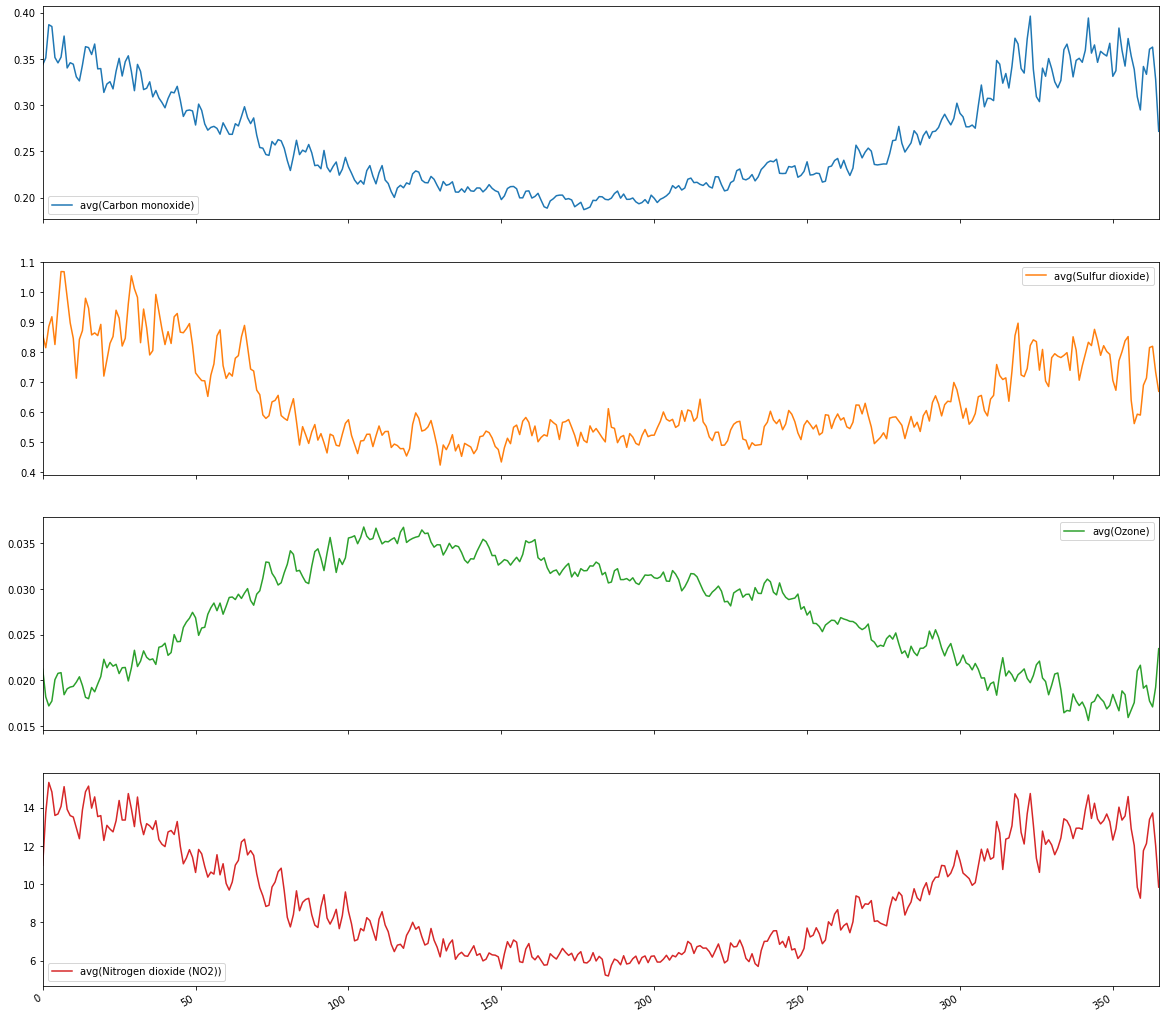

In [81]:
df \
.groupby('dayofyear(dateGMT)') \
.mean() \
.drop(['year(dateGMT)'], 1) \
.reset_index(drop=True) \
.plot.line(subplots=True, figsize=(20,20))

# Reconstructing Scaled Feature Vectors

In [82]:
cols = ['avg(Carbon monoxide)',
       'avg(Sulfur dioxide)', 'avg(Ozone)', 'avg(Nitrogen dioxide (NO2))']
arr = df['features'].apply(lambda x: np.array(x[1:-1].split(',')).astype(np.double).tolist()).to_list()

features = pd.DataFrame(arr, columns=cols)
features['day'] = df['dayofyear(dateGMT)']
features

,avg(Carbon monoxide),avg(Sulfur dioxide),avg(Ozone),avg(Nitrogen dioxide (NO2)),day
0,0.173605,0.218948,0.038844,0.263394,71
1,-0.277740,-0.170554,0.439009,-0.352688,181
2,0.000686,-0.147191,0.003611,0.158163,54
3,-0.218013,0.078513,0.264580,-0.184159,209
4,-0.126082,-0.143410,-0.324486,-0.090160,257
...,...,...,...,...,...
1942,-0.029385,0.084093,0.591943,-0.013343,122
1943,-0.054899,-0.304604,0.243882,-0.022253,93
1944,-0.331704,-0.060153,0.084179,-0.310168,197
1945,0.194197,0.548056,-0.108181,0.413404,66


# Day-Averaged Plots of Scaled Features (Exponential Moving Average)

In [103]:
featuresEMA = features
featuresEMA[cols] = features[cols].ewm(span=3).mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d5209a128>,
      dtype=object)

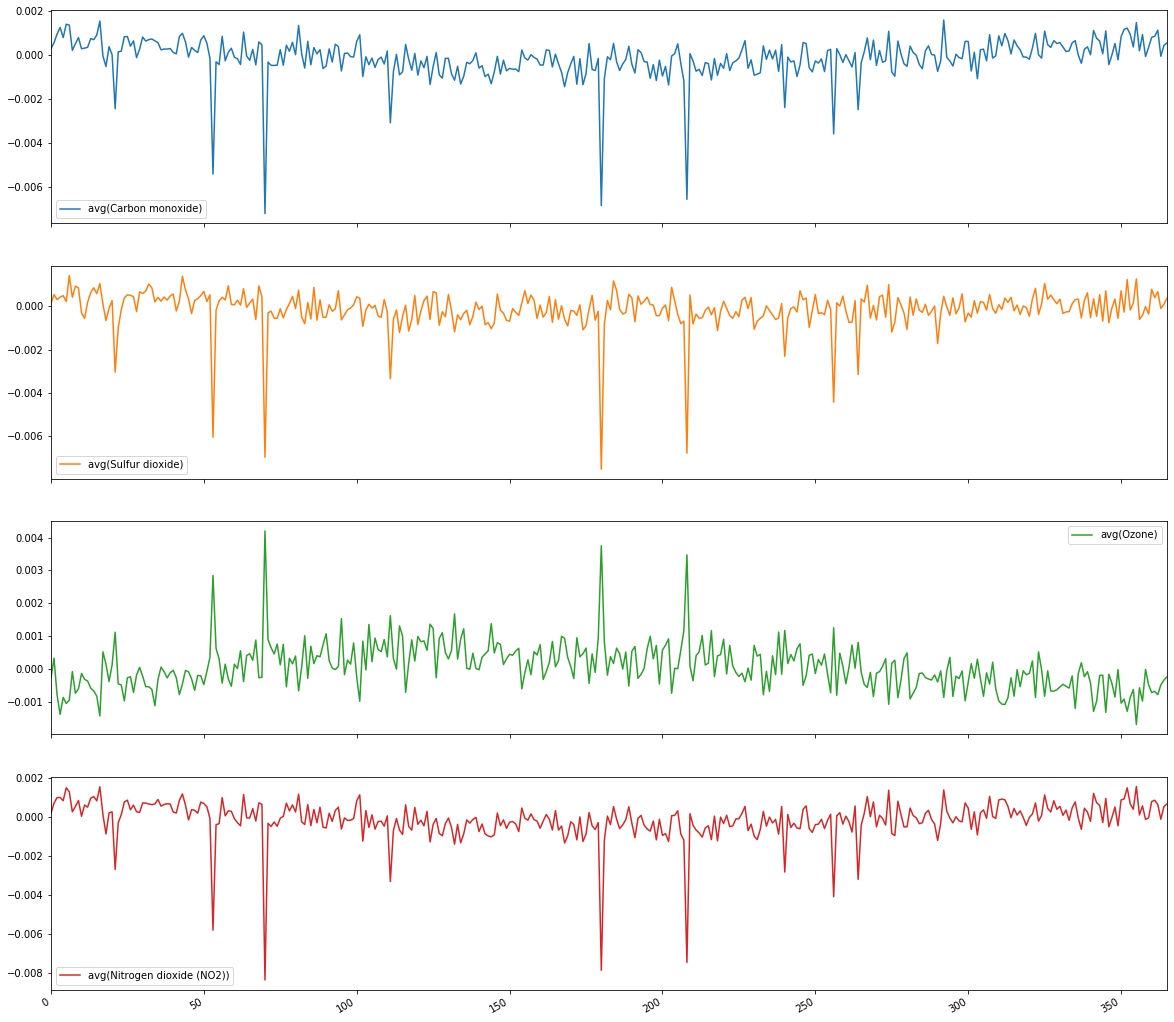

In [104]:
featuresEMA \
.groupby('day') \
.mean() \
.reset_index(drop=True) \
.plot.line(subplots=True, figsize=(20,20))

# Plot of L2-Normed Daily Pollution Vectors

This represents the magnitude of each pollution vector for each averaged day in the year (over 5 years)

This value is intuitively the pollution "badness" of that day on average

In [84]:
magnitudes = [np.linalg.norm(r, 2) for r in features.groupby('day').mean().values]

In [85]:
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

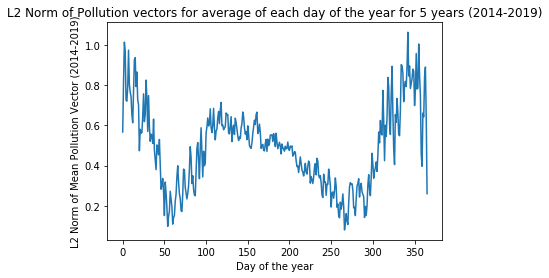

In [86]:
plt.plot(magnitudes)
plt.title("L2 Norm of Pollution vectors for average of each day of the year for 5 years (2014-2019)")
plt.xlabel("Day of the year")
plt.ylabel("L2 Norm of Mean Pollution Vector (2014-2019)")
plt.show()

# Day-Averaged Plots of Scaled Feature Normalized Gradients

In [87]:
# Gradient of Columns
c = [cc for cc in features.columns if cc != "day"]
features[c] = features[c].apply(lambda x : np.gradient(x) / np.sqrt(np.sum(x**2)))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d525a9e48>,
      dtype=object)

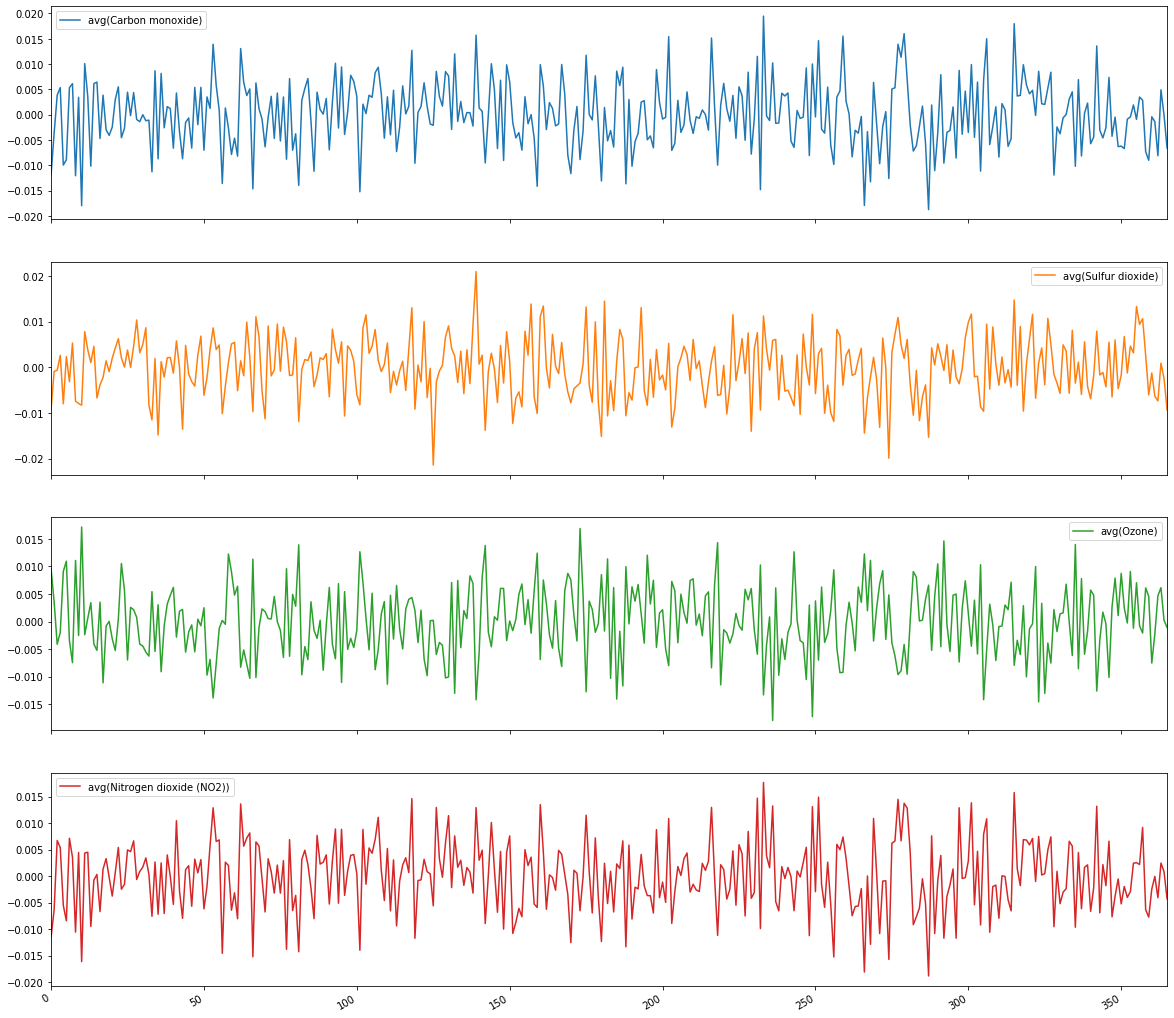

In [88]:
features \
.groupby('day') \
.mean() \
.reset_index(drop=True) \
.plot.line(subplots=True, figsize=(20,20))

In [89]:
features

,avg(Carbon monoxide),avg(Sulfur dioxide),avg(Ozone),avg(Nitrogen dioxide (NO2)),day
0,-0.039405,-0.041051,0.022126,-0.046231,71
1,-0.007548,-0.019294,-0.000974,-0.003948,181
2,0.002607,0.013125,-0.004822,0.006323,54
3,-0.005534,0.000199,-0.009070,-0.009317,209
4,0.005990,-0.013163,0.011724,0.000868,257
...,...,...,...,...,...
1942,0.008692,-0.012211,-0.000094,0.013611,122
1943,-0.013197,-0.007601,-0.014037,-0.011137,93
1944,0.010874,0.044932,-0.009733,0.016346,197
1945,0.043445,0.006288,-0.019470,0.037735,66
